# Data Science Salaries Analysis

---

## 1.0 Objectives

## 2.0 Dataset Information

### 2.1 Description

### 2.2 Data Dictionary

### 2.3 Acknowledgement & Source

---

<br/>

## 3.0 Import Library and Set Constant

In [1]:
# Enable graph in jupyter notebook
%matplotlib inline

# System
import sys
import os

# Data Sanitisation
import re

# Fetch data
import requests

In [2]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Constant
LEVELS_FYI_SALARY_SOURCE_URL = 'https://www.levels.fyi/js/salaryData.json'
RAW_SALARY_FILE_URL = 'levels-fyi-salary-raw.csv'
DS_RAW_SALARY_FILE_URL = 'ds-levels-fyi-salary-raw.csv'
DS_CLEANED_SALARY_FILE_URL = 'ds-levels-fyi-salary-cleaned.csv'

UTILS_PATH = os.path.join('..', 'utils')

In [4]:
# Below functions are common function that the author wrote and used
# Statistics for Missing Value in DataFrame
sys.path.append(UTILS_PATH)

from stats_df_na import find_col_with_na, calculate_na_pct

<br />

## 4.0 Setting Graph Style

In [5]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['figure.dpi'] = 150

sns.set_style("white")

<br />

## 5.0 Fetch and Write Data

In [6]:
# Fetch data in JSON
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
json_df = pd.DataFrame(data)

# Output raw salary in CSV
json_df.to_csv(RAW_SALARY_FILE_URL, index=False)

<br />

In [7]:
df = pd.read_csv(RAW_SALARY_FILE_URL, parse_dates=['timestamp'], dayfirst=False)

In [8]:
df['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [9]:
ds_df = df[ df['title'] == 'Data Scientist']

In [10]:
ds_df.to_csv(DS_RAW_SALARY_FILE_URL, index=False)

<br />

Below will import the csv as the main dataframe

In [11]:
df = pd.read_csv(DS_RAW_SALARY_FILE_URL)

<br />

## 6.0 Statistics Summary of Dataset (Pre Data Cleaning)

In [12]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,2018-06-05 14:06:30,LinkedIn,Senior,Data Scientist,274,"San Francisco, CA",5,0,Data Analysis,149,118,7,Male,NaN,7419,807.0,813
1,2018-06-08 00:29:47,Amazon,L4,Data Scientist,147417,"Seattle, WA",1,1,NaN,79203,68214,0,Male,NaN,11527,819.0,845
2,2018-06-08 09:49:25,Microsoft,64,Data Scientist,291,"Seattle, WA",6,7,ML / AI,229,36,26,Male,NaN,11527,819.0,849
3,2018-06-08 17:55:09,ebay,26,Data Scientist,0,"San Jose, CA",6,5,NaN,0,0,0,Female,NaN,7422,807.0,855
4,2018-06-10 19:39:35,Twitter,Staff,Data Scientist,310,"San Francisco, CA",2,5,ML / AI,107,188,15,Male,NaN,7419,807.0,870


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,2578.0,1386.326610,17763.562817,0.0,117.00,177.0,257.00,503119.0
yearsofexperience,2578.0,5.071373,4.607735,0.0,2.00,4.0,7.00,42.0
yearsatcompany,2578.0,2.064779,2.425945,0.0,1.00,1.0,3.00,22.0
basesalary,2578.0,904.607836,10754.643330,0.0,90.25,131.0,180.00,252028.0
stockgrantvalue,2578.0,390.232351,7462.262178,0.0,0.00,19.0,53.75,284257.0
bonus,2578.0,91.486424,1876.027778,0.0,1.00,13.0,24.00,70932.0
cityid,2578.0,9986.732739,6609.613358,1182.0,7419.00,8178.0,11521.00,47926.0
dmaid,2578.0,620.963150,275.901269,0.0,505.00,807.0,807.00,862.0
rowNumber,2578.0,43468.069822,24508.271158,813.0,22799.25,44403.0,65561.75,83867.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                2578 non-null   object 
 1   company                  2578 non-null   object 
 2   level                    2572 non-null   object 
 3   title                    2578 non-null   object 
 4   totalyearlycompensation  2578 non-null   int64  
 5   location                 2578 non-null   object 
 6   yearsofexperience        2578 non-null   int64  
 7   yearsatcompany           2578 non-null   int64  
 8   tag                      2573 non-null   object 
 9   basesalary               2578 non-null   int64  
 10  stockgrantvalue          2578 non-null   int64  
 11  bonus                    2578 non-null   int64  
 12  gender                   1740 non-null   object 
 13  otherdetails             1815 non-null   object 
 14  cityid                  

<br/>

## 7.0 Preprocessing

### 7.1 Data Cleaning

Find which feature column contains missing values

In [15]:
col_with_na, has_na = find_col_with_na(df)

In [16]:
col_with_na

Index(['level', 'tag', 'gender', 'otherdetails'], dtype='object')

In [17]:
calculate_na_pct(df)

gender          32.505818
otherdetails    29.596587
level            0.232739
tag              0.193949
dtype: float64

<br />

In [18]:
df['gender'].value_counts()

Male      1357
Female     361
Other       22
Name: gender, dtype: int64

In [19]:
df['gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

The dataset consists of 32.51% missing value for feature *gender*. Since the user at levels.fyi does not intend to disclose, we will impute these missing value as 'other' category.

In [20]:
replace_value = {
    'gender': 'Other'
}

df = df.fillna(value=replace_value)

In [21]:
calculate_na_pct(df)

otherdetails    29.596587
level            0.232739
tag              0.193949
dtype: float64

<br />

For the feature *otherdetails* that consists 29.60% of missing value, we can ignore it for now because this feature will be drop during feature selection. Same goes for the feature *tag* that consists 0.19% missing value.

As for the last feature *level* that contains 0.23% of missing value, we can remove the instances from the dataset. Since, the missing value is small and can be safely ignored.

In [22]:
df = df.dropna(subset=['level'])

<br />

In [23]:
calculate_na_pct(df)

otherdetails    29.587869
tag              0.194401
dtype: float64

<br />

### 7.2 Feature Selection

In [24]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

We will be dropping the feature *title* as this is a filtered dataset contains only 'Data Scientist* as the only title. Moreover, we will also dropping feature *tag*, *otherdetails*, *cityid*, *dmaid* and *rowNumber*

In [25]:
df = df.drop(['title', 'tag', 'otherdetails', 'cityid', 'dmaid','rowNumber'], axis=1)

In [26]:
df.columns

Index(['timestamp', 'company', 'level', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender'],
      dtype='object')

<br />

In [27]:
calculate_na_pct(df)

Series([], dtype: float64)

After performing data cleaning and feature selection, the dataframe no longer contains any missing value and irrevelant features

<br />

### 7.3 Feature Engineering

#### 7.3.1 level

In [28]:
df['level'].nunique() / len(df) * 100

17.573872472783826

In [29]:
df['level'].nunique()

452

In [30]:
df['level'].unique()

array(['Senior', 'L4', '64', '26', 'Staff', 'T6', '5', 'L5', 'E3', '65',
       'L6', 'Senior Engineer', 'II', 'IC5', 'Sr UX Researcher 4',
       'Staff Engineer', 'Senior Associate', 'L',
       'Associate Senior Data Scientist', '67', '62', 'P2',
       'Senior Software Engineer', 'Bioinformatics Scientist II', 'L3',
       'MTS 1', 'IC4', 'ICT3', 'P6', '63', 'SDE III', 'Ic3',
       'Principal SWE', 'L2', 'L64', 'ICT4', 'Entry', 'Fellow 1',
       'SDE II', '1', '2', 'T3', 'Staff Software Engineer',
       'Vice President', '7', 'Senior vice president', 'IC3',
       'Data Science Manager', 'ICT5', 'IC6', '603',
       'Executive Director / Vice-President', '60', 'E4', 'Data Engineer',
       'Grade 11', 'Member', '3', '59', 'P4', 'T24', 'Data Scientist 1',
       'Director', 'senior', '61', 'L7', '66', 'IC-2',
       'Senior Data Scientist', 'Lead', 'E5', 'Analyst', 'Grade 6', '25',
       '13', 'Distinguished MTS', 'Senior Consultant', 'L24',
       'Software Engineer (SWE)', 'Ma

The *level* that each company offered is unique. Based on the information, there are 17.57% or 452 of different job title in the dataset. After all, the dataset is all about data scientist job, the different job title is just an indication of seniority of the position.
<br/>
<br/>
The three most common work experience level is junior, intermediate and senior. Based on the *level* given by the dataset, we will be assigning appropriate category to the instances.

In [31]:
# the title keyword retrieved by skimming through the dataset and using levels.fyi as a guideline
def assign_seniority(title):
    senior_title_keyword = ['sr', 'senior', 'manager', 'vp', 'principal', 'lead', 
                            'director', 'head', 'supervisor', 'supervisory', 'executive',
                            'l7', 'l8', 'l9', 'l10', 'e7', 'e8', 'e9', '67', 'partner 68',
                            '69', '70', '80']
    junior_title_keyword = ['jr', 'junior', 'intern', 'internship', 'associate', 'entry'
                            'l3', 'l4', 'e3', 'e4', 'sde 59', '60', 'sde ii', '62', 'sde i',
                            'sde ii']
    
    # Input Sanitisation
    title = title.lower()
    title = re.sub('[^a-zA-Z0-9 \n\.]', ' ', title)
    
    if any(keyword in title for keyword in senior_title_keyword):
        return 'Senior'
    elif any(keyword in title for keyword in junior_title_keyword):
        return 'Junior'
    else:
        return 'Intermediate'

In [32]:
df['Seniority'] = df['level'].apply(assign_seniority)

Intermediate    1797
Junior           410
Senior           365
Name: Seniority, dtype: int64

In [ ]:
df['seniority'].value_counts()

<br/>

#### 7.3.2 location

In [33]:
df['location'].nunique()

225

In [34]:
df['location'].unique()

array(['San Francisco, CA', 'Seattle, WA', 'San Jose, CA', 'Kirkland, WA',
       'Singapore, SG, Singapore', 'Bellevue, WA', 'Los Gatos, CA',
       'Palo Alto, CA', 'New York, NY', 'Menlo Park, CA', 'Roseland, NJ',
       'San Diego, CA', 'Mc Lean, VA', 'Boston, MA', 'Washington, DC',
       'Redmond, WA', 'Mountain View, CA', 'Cupertino, CA',
       'Hangzhou, ZJ, China', 'Sunnyvale, CA', 'Bloomington, MN',
       'Amsterdam, NH, Netherlands', 'Austin, TX', 'Santa Monica, CA',
       'Charlotte, NC', 'Dallas, TX', 'London, EN, United Kingdom',
       'Albuquerque, NM', 'Cary, NC', 'Atlanta, GA', 'Cambridge, MA',
       'Bentonville, AR', 'Irvine, CA', 'Los Angeles, CA', 'Chicago, IL',
       'Bangalore, KA, India', 'Toronto, ON, Canada', 'Broomfield, CO',
       'Vancouver, BC, Canada', 'Hillsboro, OR', 'Santa Clara, CA',
       'Gurgaon, HR, India', 'Plano, TX', 'Columbus, OH',
       'Colorado Springs, CO', 'Portland, OR', 'Berkeley, CA',
       'Morrisville, NC', 'Boulder, CO', '

Just by skimming through the dataset, we can notice most of the location is in the United State. Some location in the US is further divided by city. With 225 different location, it will be hard for us to do any analyse. Thus, we will be categorise above locations into 7 continents: Asia, Africa, North America, South America, Antarctica, Europe, and Australia

In [35]:
def get_country_or_state(row):
    return row.split(',')[-1].strip()

In [36]:
unique_country_or_state = pd.Series(df['location'].unique()).apply(get_country_or_state)

In [37]:
unique_country_or_state.unique()

array(['CA', 'WA', 'Singapore', 'NY', 'NJ', 'VA', 'MA', 'DC', 'China',
       'MN', 'Netherlands', 'TX', 'NC', 'United Kingdom', 'NM', 'GA',
       'AR', 'IL', 'India', 'Canada', 'CO', 'OR', 'OH', 'PA', 'DE',
       'United Arab Emirates', 'Germany', 'UT', 'AZ', 'Israel', 'FL',
       'Italy', 'MI', 'WI', 'MO', 'Switzerland', 'Russia', 'Sweden', 'IN',
       'Ukraine', 'Australia', 'CT', 'Taiwan', 'Japan', 'Brazil',
       'Luxembourg', 'ID', 'TN', 'KS', 'RI', 'KY', 'France', 'Ireland',
       'Spain', 'Hong Kong (SAR)', 'SC', 'MD', 'NV', 'AL', 'Austria',
       'OK', 'MS', 'NH', 'Poland'], dtype=object)

In [42]:
state_country_to_continent_dict = {
    'CA': 'North America', 'WA': 'North America', 'NY': 'North America', 'NJ': 'North America', 
    'VA': 'North America', 'MA': 'North America', 'DC': 'North America', 'MN': 'North America', 
    'TX': 'North America', 'NC': 'North America', 'NM': 'North America', 'GA': 'North America',
    'AR': 'North America', 'IL': 'North America', 'CO': 'North America', 'OR': 'North America', 
    'OH': 'North America', 'PA': 'North America', 'DE': 'North America', 'UT': 'North America', 
    'AZ': 'North America', 'FL': 'North America', 'MI': 'North America', 'WI': 'North America', 
    'MO': 'North America', 'IN': 'North America', 'CT': 'North America', 'ID': 'North America', 
    'TN': 'North America', 'KS': 'North America', 'RI': 'North America', 'KY': 'North America', 
    'SC': 'North America', 'MD': 'North America', 'NV': 'North America', 'AL': 'North America', 
    'OK': 'North America', 'MS': 'North America', 'NH': 'North America', 'Canada': 'North America', 

    'Switzerland': 'Europe', 'Sweden': 'Europe', 'Italy': 'Europe', 'Germany': 'Europe', 
    'United Kingdom': 'Europe', 'Netherlands': 'Europe', 'Ukraine': 'Europe', 
    'Luxembourg': 'Europe', 'France': 'Europe', 'Ireland': 'Europe', 'Spain': 'Europe',
    'Austria': 'Europe', 'Poland': 'Europe',
    
    'Singapore': 'Asia', 'China': 'Asia', 'India': 'Asia', 'United Arab Emirates': 'Asia', 
    'Israel': 'Asia', 'Russia': 'Asia', 'Taiwan': 'Asia', 'Japan': 'Asia', 
    'Hong Kong (SAR)': 'Asia', 
    
    'Brazil': 'South America', 
    'Australia': 'Australia'
}

def get_continent(loc):
    key = get_country_or_state(loc)
    
    return state_country_to_continent_dict.get(key, '')

In [48]:
df['continent'] = df['location'].apply(get_continent)

In [111]:
df['continent'].value_counts()

North America    2051
Asia              135
Europe            122
Australia           5
South America       1
Name: continent, dtype: int64

In [49]:
df.head()

,timestamp,company,level,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Seniority,continent
0,2018-06-05 14:06:30,LinkedIn,Senior,274,"San Francisco, CA",5,0,149,118,7,Male,Senior,North America
1,2018-06-08 00:29:47,Amazon,L4,147417,"Seattle, WA",1,1,79203,68214,0,Male,Junior,North America
2,2018-06-08 09:49:25,Microsoft,64,291,"Seattle, WA",6,7,229,36,26,Male,Intermediate,North America
3,2018-06-08 17:55:09,ebay,26,0,"San Jose, CA",6,5,0,0,0,Female,Intermediate,North America
4,2018-06-10 19:39:35,Twitter,Staff,310,"San Francisco, CA",2,5,107,188,15,Male,Intermediate,North America


<br />

#### 7.3.3 Finalise

We had feature engineered derived new features (*seniority*, *continent*) which based on feature *level* and *location*. Thus, we will drop feature *level* and *continent*. If without dropping these two features, it will cause the issue on while training the model as it will give a false sense to the model that location and level have a higher weightage. These two derived feature and their original feature has a high correlation.

For feature *totalyearcompensation*, it is made up of features *basesalary*, *stockgrantvalue*, and *bonus*. We will not drop features *basesalary*, *stockgrantvalue*, and *bonus* as these features seems can provide insight to us during EDA. However, while training the model, only feature *totalyearcompensation* will be used as dependant variable and features *basesalary*, *stockgrantvalue*, and *bonus* will not be include in the indepedent variables.

In [52]:
df = df.drop(['level', 'location'], axis=1)

<br />

## 8.0 Statistics Summary of Dataset

In [56]:
df.head()

,timestamp,company,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Seniority,continent
0,2018-06-05 14:06:30,LinkedIn,274,5,0,149,118,7,Male,Senior,North America
1,2018-06-08 00:29:47,Amazon,147417,1,1,79203,68214,0,Male,Junior,North America
2,2018-06-08 09:49:25,Microsoft,291,6,7,229,36,26,Male,Intermediate,North America
3,2018-06-08 17:55:09,ebay,0,6,5,0,0,0,Female,Intermediate,North America
4,2018-06-10 19:39:35,Twitter,310,2,5,107,188,15,Male,Intermediate,North America


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2572 entries, 0 to 2577
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                2572 non-null   object
 1   company                  2572 non-null   object
 2   totalyearlycompensation  2572 non-null   int64 
 3   yearsofexperience        2572 non-null   int64 
 4   yearsatcompany           2572 non-null   int64 
 5   basesalary               2572 non-null   int64 
 6   stockgrantvalue          2572 non-null   int64 
 7   bonus                    2572 non-null   int64 
 8   gender                   2572 non-null   object
 9   Seniority                2572 non-null   object
 10  continent                2572 non-null   object
dtypes: int64(6), object(5)
memory usage: 241.1+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,2572.0,1341.579316,17622.243942,0.0,117.00,177.0,257.0,503119.0
yearsofexperience,2572.0,5.074650,4.611878,0.0,2.00,4.0,7.0,42.0
yearsatcompany,2572.0,2.066096,2.428180,0.0,0.75,1.0,3.0,22.0
basesalary,2572.0,858.754666,10495.344858,0.0,90.00,130.5,180.0,252028.0
stockgrantvalue,2572.0,391.142691,7470.940688,0.0,0.00,19.0,54.0,284257.0
bonus,2572.0,91.681960,1878.211157,0.0,1.00,13.0,24.0,70932.0


After perform some preprocessing on the dataset, there still has issue on the feature *totalyearlycompensation*. The minimum and maximum of *totalyearlycompensation* is 0 and 503119 respectively which. The 1st quartile and 3rd quartile of *totalyearlycompensation* is just 117 and 257. Thus, it is recommend the outlier of the dataset.

<br />

In [109]:
df[['totalyearlycompensation']].quantile(0.05)

totalyearlycompensation    62.65
Name: 0.05, dtype: float64

In [63]:
df[['totalyearlycompensation']].quantile(0.95)

totalyearlycompensation    445.45
Name: 0.95, dtype: float64

The 0.05 quantile and 0.95 quantile seem reasonable for *totalyearlycompensation* to have 26.55 and 445.45 respectively. We will use the data between 0.05 and 0.95 quantile data

In [105]:
q05 = df[['totalyearlycompensation']].quantile(0.05)[0]
q95 = df[['totalyearlycompensation']].quantile(0.95)[0]

In [108]:
df = df[ (df['totalyearlycompensation'] >= q05) & (df['totalyearlycompensation'] <= q95) ]

In [110]:
df.head()

,timestamp,company,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Seniority,continent
0,2018-06-05 14:06:30,LinkedIn,274,5,0,149,118,7,Male,Senior,North America
2,2018-06-08 09:49:25,Microsoft,291,6,7,229,36,26,Male,Intermediate,North America
4,2018-06-10 19:39:35,Twitter,310,2,5,107,188,15,Male,Intermediate,North America
6,2018-06-17 11:39:38,Facebook,283,9,2,122,112,49,Male,Intermediate,North America
7,2018-06-17 19:02:50,Amazon,434,2,0,208,109,117,Male,Intermediate,North America


<br />

## 9.0 EDA

In [117]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.243015,0.086844,0.833112,0.686469,0.440150
yearsofexperience,0.243015,1.000000,0.405163,0.198473,0.134203,0.191019
yearsatcompany,0.086844,0.405163,1.000000,0.075787,0.035889,0.080817
basesalary,0.833112,0.198473,0.075787,1.000000,0.231755,0.225899
stockgrantvalue,0.686469,0.134203,0.035889,0.231755,1.000000,0.124585
bonus,0.440150,0.191019,0.080817,0.225899,0.124585,1.000000


<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

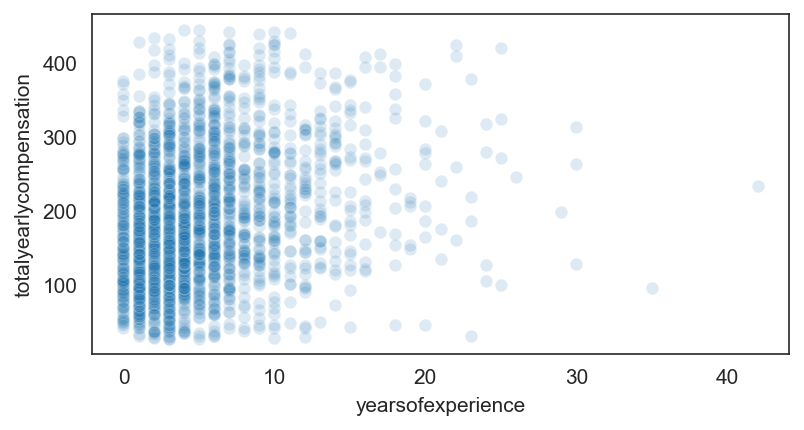

In [115]:
sns.scatterplot(data=df, x='yearsofexperience', y='totalyearlycompensation', alpha=0.15)

For data science, thetotalyearly

<AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>

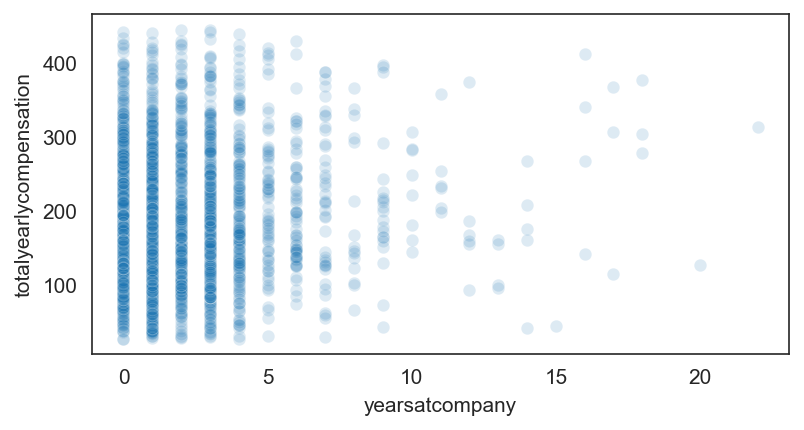

In [119]:
sns.scatterplot(data=df, x='yearsatcompany', y='totalyearlycompensation', alpha=0.15)

## 9.0 Building Model

---

## 9.0 Conclusion